<a href="https://colab.research.google.com/github/2025-02-FML-team/WV-Team/blob/main/notebooks/02_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석
mathpltlib / seaborn등의 툴을 이용해서 데이터 특성을 알아보고 분류 계획을 세웁니다.

In [8]:
import os
from pathlib import Path

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    data_dir = Path('/content/data')
else:
    data_dir= Path(os.path.join(os.getcwd(), "../data/")).resolve()

In [9]:
# Data Handling
import numpy as np
import pandas as pd

# Display
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 스타일 설정
plt.style.use("seaborn-v0_8-whitegrid")

In [10]:
csv_dir = data_dir / 'whiskies_filtered.csv'
csv_dir

PosixPath('/Volumes/Backup/Workspace/ML/WV-Team/data/whiskies_filtered.csv')

In [11]:
df = pd.read_csv(csv_dir)
df.head()

,id,name,name_eng,volume,alcohol,price,brand,nation,bottled,region,region_detail,distillery,importer,local_full_path,eng_category
0,63800001,1423 S.B.S 가이아나 2020,1423 S.B.S Guyana 2020,700,66.4,124900,1423 S.B.S,가이아나,NaN,NaN,NaN,NaN,NaN,photos/63800001_1.webp,Other
1,11201698,카발란 클래식 싱글몰트,Kavalan Classic Single Malt,700,40.0,144000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,photos/11201698_2.png,Single Malt
2,11201699,카발란 콘서트마스터 포트 캐스크 피니시,Kavalan Concertmaster Port Cask Finish,700,40.0,173000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,photos/11201699_1.webp,Single Malt
3,11201700,카발란 콘서트마스터 포트 캐스크 피니시 1L,Kavalan Concertmaster Port Cask Finish 1L,1000,40.0,200000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,photos/11201700_1.webp,Single Malt
4,11201701,카발란 콘서트마스터 셰리 캐스크 피니시,Kavalan Concertmaster Sherry Cask Finish,700,40.0,204000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,photos/11201701_1.webp,Single Malt


In [12]:
# 전체 열 목록
cols = df.columns.tolist()

# 숫자형과 범주형 분리
num_cols = df.select_dtypes(include=np.number).columns.drop([
    'id', 
    'bottled',
    'importer'
], errors="ignore")
cat_cols = df.select_dtypes(exclude=np.number).columns.drop([
    'name', 
    'name_eng',
    #'external_image_url', 
    #'image_url', 
    #'full_image_url',
    'name_eng-2'
], errors="ignore")

print("📊 숫자형 특성:", list(num_cols))
print("🏷️ 범주형 특성:", list(cat_cols))

📊 숫자형 특성: ['volume', 'alcohol', 'price']
🏷️ 범주형 특성: ['brand', 'nation', 'region', 'region_detail', 'distillery', 'local_full_path', 'eng_category']


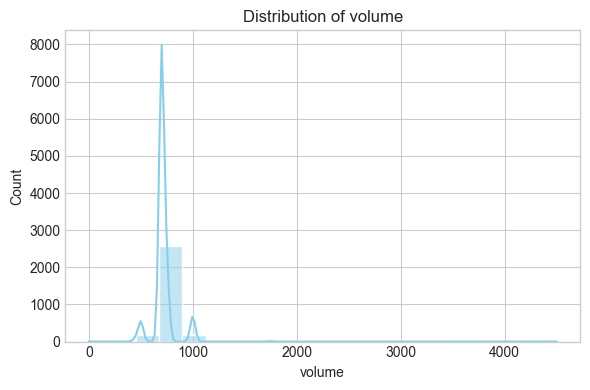

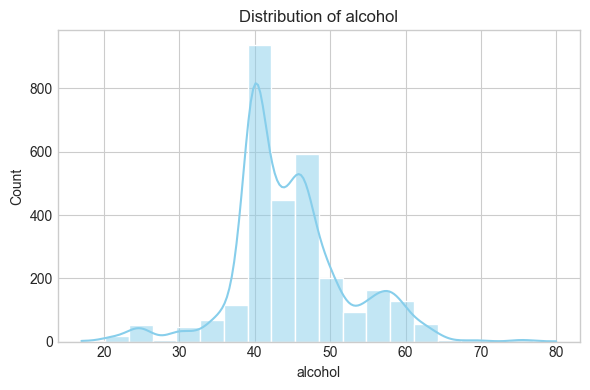

In [13]:
for col in num_cols:
    if('price' == col):
        continue
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue", edgecolor="white")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

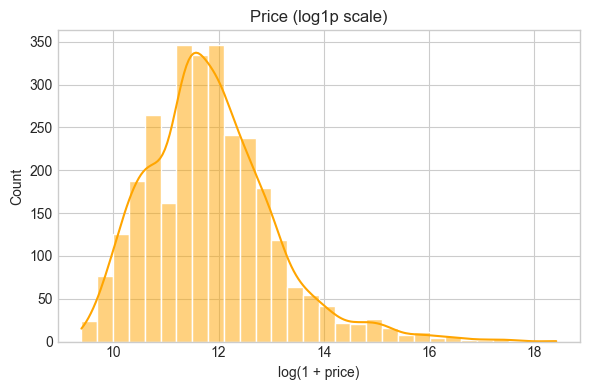

In [14]:
# price는 로그 스케일로 시각화
if "price" in df.columns:
    plt.figure(figsize=(6, 4))
    
    # 0 이하 값은 로그 불가 → 제거
    price_series = df["price"][df["price"] > 0]
    
    sns.histplot(np.log1p(price_series), bins=30, kde=True, color="orange", edgecolor="white")
    plt.title("Price (log1p scale)")
    plt.xlabel("log(1 + price)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

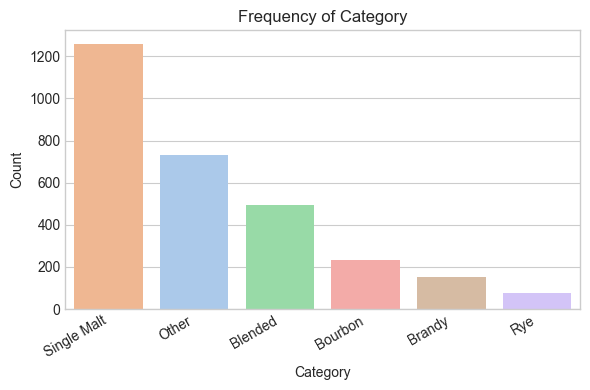

In [15]:
plt.figure(figsize=(6, 4))
order = df["eng_category"].value_counts().index  # 빈도순 정렬
sns.countplot(
    x="eng_category",
    hue="eng_category",
    data=df,
    order=order,
    palette="pastel",
    legend=False
)
plt.title("Frequency of Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [16]:
# 도수 기준 구간 설정
bins = [0, 40, 43, 46, 100]  # 
labels = ["<40", "40–43", "43–46", "46+"]

df["alcohol_group"] = pd.cut(df["alcohol"], bins=bins, labels=labels, right=False)

# 결과 확인
print(df[["alcohol", "alcohol_group"]].head(10))
print("\n도수 구간별 개수:\n", df["alcohol_group"].value_counts())

   alcohol alcohol_group
0     66.4           46+
1     40.0         40–43
2     40.0         40–43
3     40.0         40–43
4     40.0         40–43
5     40.0         40–43
6     46.0           46+
7     46.0           46+
8     46.0           46+
9     46.0           46+

도수 구간별 개수:
 alcohol_group
46+      1221
40–43     948
43–46     467
<40       307
Name: count, dtype: int64


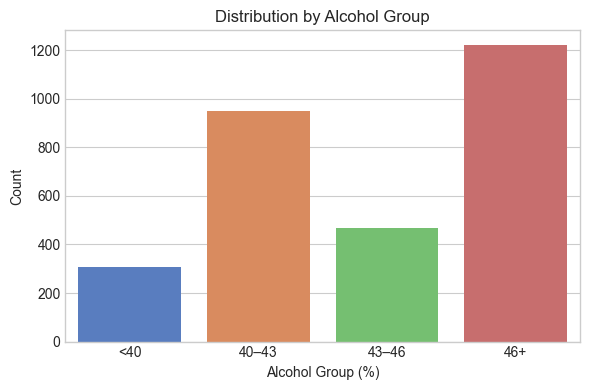

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x="alcohol_group",
    hue="alcohol_group",
    data=df,
    order=labels,
    palette="muted"
)
plt.title("Distribution by Alcohol Group")
plt.xlabel("Alcohol Group (%)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [18]:
#모델용
bin_token_map = {
    "<40": "SM_B40",
    "40–43": "SM_40_43",
    "43–46": "SM_43_46",
    "46+": "SM_G46",
}

df["category"] = np.where(
    df["eng_category"].eq("Single Malt"),
    df["alcohol_group"].map(bin_token_map).astype(str),
    df["eng_category"]
)

print(df[["category", "alcohol", "alcohol_group"]].head(10))

   category  alcohol alcohol_group
0     Other     66.4           46+
1  SM_40_43     40.0         40–43
2  SM_40_43     40.0         40–43
3  SM_40_43     40.0         40–43
4  SM_40_43     40.0         40–43
5  SM_40_43     40.0         40–43
6    SM_G46     46.0           46+
7    SM_G46     46.0           46+
8    SM_G46     46.0           46+
9    SM_G46     46.0           46+


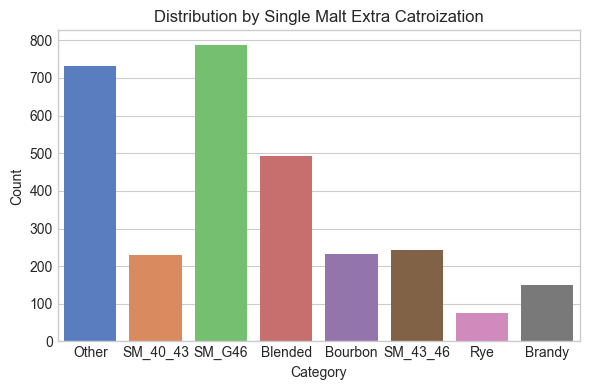

In [19]:
#추가 분할
plt.figure(figsize=(6, 4))
sns.countplot(
    x="category",
    hue="category",
    data=df,
    palette="muted"
)
plt.title("Distribution by Single Malt Extra Catroization")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [20]:
print("카테고리별 개수:\n", df["category"].value_counts())

카테고리별 개수:
 category
SM_G46      787
Other       731
Blended     494
SM_43_46    243
Bourbon     231
SM_40_43    230
Brandy      151
Rye          76
Name: count, dtype: int64


In [21]:
#어째서인지 안먹히는듯?
df.drop('eng_category', axis=1)

,id,name,name_eng,volume,alcohol,price,brand,nation,bottled,region,region_detail,distillery,importer,local_full_path,alcohol_group,category
0,63800001,1423 S.B.S 가이아나 2020,1423 S.B.S Guyana 2020,700,66.4,124900,1423 S.B.S,가이아나,NaN,NaN,NaN,NaN,NaN,photos/63800001_1.webp,46+,Other
1,11201698,카발란 클래식 싱글몰트,Kavalan Classic Single Malt,700,40.0,144000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,photos/11201698_2.png,40–43,SM_40_43
2,11201699,카발란 콘서트마스터 포트 캐스크 피니시,Kavalan Concertmaster Port Cask Finish,700,40.0,173000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,photos/11201699_1.webp,40–43,SM_40_43
3,11201700,카발란 콘서트마스터 포트 캐스크 피니시 1L,Kavalan Concertmaster Port Cask Finish 1L,1000,40.0,200000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,photos/11201700_1.webp,40–43,SM_40_43
4,11201701,카발란 콘서트마스터 셰리 캐스크 피니시,Kavalan Concertmaster Sherry Cask Finish,700,40.0,204000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,photos/11201701_1.webp,40–43,SM_40_43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,10402903,기린 싱글몰트 위스키 후지,Kirin Single Malt Whisky Fuji,700,46.0,249000,FUJI,일본,NaN,NaN,NaN,NaN,NaN,photos/10402903_1.webp,46+,SM_G46
2939,10702848,뱅크홀 브리티쉬 싱글몰트 위스키,Bankhall British Single Malt Whisky,700,40.0,48600,NaN,영국,NaN,NaN,NaN,NaN,NaN,photos/10702848_1.webp,40–43,SM_40_43
2940,11402893,람푸르 아사바,Rampur Asava,700,45.0,213000,NaN,인도,NaN,NaN,NaN,NaN,NaN,photos/11402893_1.webp,43–46,SM_43_46
2941,11402894,람푸르 더블 캐스크,Rampur Double Cask,700,45.0,134300,NaN,인도,NaN,NaN,NaN,NaN,NaN,photos/11402894_1.webp,43–46,SM_43_46


In [40]:
new_csv_dir = data_dir / 'whiskies_recategorized.csv'
new_csv_dir

PosixPath('/Volumes/Backup/Workspace/ML/WV-Team/data/whiskies_recategorized.csv')

In [41]:
df.to_csv(new_csv_dir, index=False)

In [42]:
relabel_csv_dir = data_dir / 'whiskies_relabel.csv'
relabel_csv_dir

PosixPath('/Volumes/Backup/Workspace/ML/WV-Team/data/whiskies_relabel.csv')

In [43]:
df = pd.read_csv(relabel_csv_dir, low_memory=False)
df.head()

,id,name,name_eng,category,volume,alcohol,price,brand,nation,distillery,local_full_path,eng_category,alcohol_group,region
0,10101748,애버펠디 12년,Aberfeldy 12yo,SM_40_43,700,40.0,75000,Aberfeldy,스코틀랜드,Aberfeldy,photos/10101748_1.webp,Single Malt,40–43,하이랜드
1,10101749,애버펠디 12년 1L,Aberfeldy 12yo 1L,SM_40_43,1000,40.0,134000,Aberfeldy,스코틀랜드,Aberfeldy,photos/10101749_1.webp,Single Malt,40–43,하이랜드
2,10101750,애버펠디 16년,Aberfeldy 16yo,SM_40_43,700,40.0,125000,Aberfeldy,스코틀랜드,Aberfeldy,photos/10101750_1.webp,Single Malt,40–43,하이랜드
3,10101751,애버펠디 16년 익셉셔널 캐스크,Aberfeldy 16yo Exceptional Cask,SM_43_46,700,43.0,270000,Aberfeldy,스코틀랜드,Aberfeldy,photos/10101751_1.webp,Single Malt,43–46,하이랜드
4,10101752,애버펠디 21년,Aberfeldy 21yo,SM_40_43,700,40.0,309000,Aberfeldy,스코틀랜드,Aberfeldy,photos/10101752_1.webp,Single Malt,40–43,하이랜드


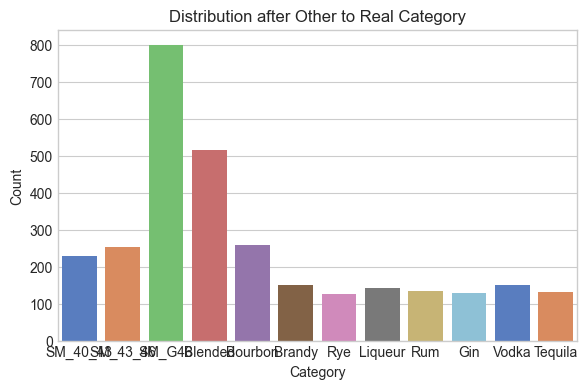

In [44]:
#Other 전부 재분배함
plt.figure(figsize=(6, 4))
sns.countplot(
    x="category",
    hue="category", #... deprecate 뜨는데 원하는대로 해줘둬 말은 안듣는 관계로...
    legend=False,
    data=df,
    palette="muted"
)
plt.title("Distribution after Other to Real Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [45]:
print("카테고리별 개수:\n", df["category"].value_counts())

카테고리별 개수:
 category
SM_G46      800
Blended     518
Bourbon     260
SM_43_46    256
SM_40_43    232
Brandy      153
Vodka       152
Liqueur     143
Rum         137
Tequila     134
Gin         130
Rye         127
Name: count, dtype: int64
